In [1]:
import pandas as pd

bank_df = pd.read_csv('C:/Users/jy990/OneDrive/바탕 화면/뇌/2022/2022/Python/머신러닝데이터 전처리입문/데이터셋/chap3_4_6_7_A1-5/chap3-4/data/bank.csv', sep=',')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [2]:
bank_df.tail(10) # 마지막 10개 추출

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [4]:
print(bank_df.shape) # 데이터의 행과 열

(7234, 17)


In [6]:
print(bank_df.dtypes) # 데이터형. 항상 확인해라

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [8]:
print(bank_df.isnull().any(axis=1)) # 행 방향에 대해 결손값이 있으면 TRUE
print(bank_df.isnull().any(axis=0)) # 열 방향에 대해 결손값이 있으면 TRUE

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool
age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool


In [9]:
print(bank_df.isnull().sum(axis=1)) # 행 별로 결손값 개수
print(bank_df.isnull().sum(axis=0)) # 열 별로 결손값 개수

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64
age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64


In [13]:
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False))
print(bank_df.isnull().sum(axis=0).sort_values(ascending=False))

139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64
poutcome     5900
contact      2038
education     273
job            44
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64


In [14]:
bank_df.describe() # 기초통계량 계산

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [15]:
bank_df.describe(include=[object]) # obejct형의 통계량만 계산하기

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


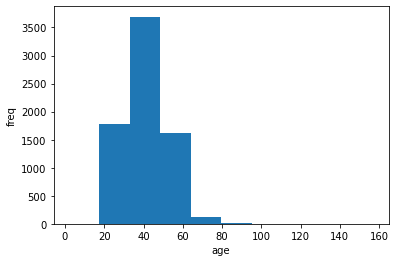

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bank_df['age']) # age 히스토그램 작성
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

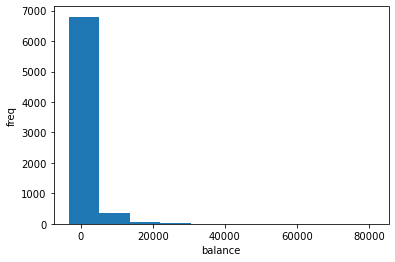

In [19]:
plt.hist(bank_df['balance'])

plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

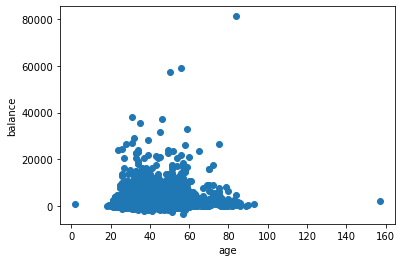

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [20]:
plt.scatter(bank_df['age'], bank_df['balance']) # scatter plot
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

bank_df[['age', 'balance']].corr() # 상관계수

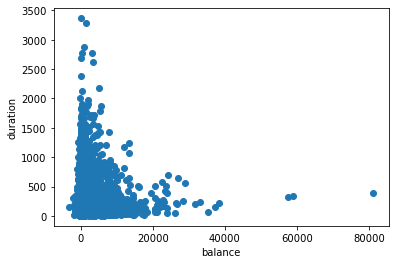

,balance,duration
balance,1.00000,0.00934
duration,0.00934,1.00000


In [22]:
plt.scatter(bank_df['balance'], bank_df['duration'])
plt.xlabel('balance')
plt.ylabel('duration')
plt.show()

bank_df[['balance', 'duration']].corr()

In [23]:
print(bank_df['job'].value_counts(ascending=False, normalize=True)) # 값의 발생 횟수를 카운트해 내림차순 정렬하고 정규화한다.

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64


C:\Users\jy990\AppData\Local\Temp/ipykernel_9852/3462854661.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(job_vals, labels=job_label) # 파이차트를 만듦


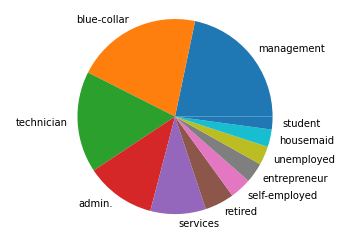

In [31]:
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values# index와 value를 각각 다르게 저장함.

plt.pie(job_vals, labels=job_label) # 파이차트를 만듦
plt.axis('equal') # 가로 세로 비율이 동일하게
plt.show()

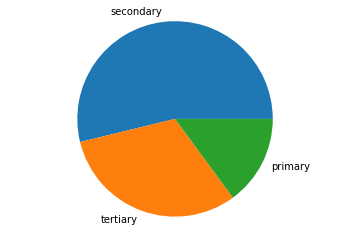

In [30]:
education_label = bank_df['education'].value_counts(ascending=False, normalize=True).index
education_vals = bank_df['education'].value_counts(ascending=False, normalize=True).values

plt.pie(education_vals, labels=education_label)
plt.axis('equal')
plt.show()

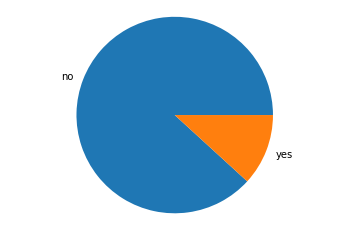

In [33]:
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()

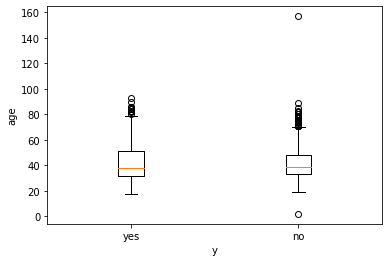

In [34]:
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == "no"]
y_age = [y_yes['age'], y_no['age']]

plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax=plt.gca() # 축의 위치를 ax로 호출함.
plt.setp(ax, xticklabels=['yes', 'no']) # setp : 그래프에 옵션 추가 / x축 라벨을 yes와 no로 설정
plt.show()